# Sustainability Goals

Get the Sustainability Goals data from the World Bank Website:https://api.worldbank.org/v2/sources/46/indicators

Documentation on the Sustainability Goals can be found here: https://datatopics.worldbank.org/sdgatlas/




In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import datetime
import wbdata
import plotly.express as px
import plotly.io as pio
import requests

In [2]:
# Requesting the indicators for the topic Global Sustainability Goals.  The 46 is the key for the Global Sustainability Goals Data.
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=46")
indicatorsJSON = indicators.json()

In [3]:
# Get all Global Sustainability indicators so we know what is available
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=46&per_page=500")
indicatorsJSON = indicators.json()
#print(indicatorsJSON) # to view ALL of the indicators as is, remove the "#" at the beginning of the print command

# Parse through the response to see the Indicator IDs and Names
for i in indicatorsJSON[1]:
    IDSindicators = (i["id"],i["name"])
    print(IDSindicators) # to view the indicator ids and names, remove the "#" at the beginning of the print command

('AG.LND.FRST.K2', 'Forest area (sq. km)')
('AG.LND.FRST.ZS', 'Forest area (% of land area)')
('AG.YLD.CREL.KG', 'Cereal yield (kg per hectare)')
('BN.CAB.XOKA.GD.ZS', 'Current account balance (% of GDP)')
('BN.KLT.PTXL.CD', 'Portfolio Investment, net (BoP, current US$)')
('BX.KLT.DINV.CD.WD', 'Foreign direct investment, net inflows (BoP, current US$)')
('BX.KLT.DINV.WD.GD.ZS', 'Foreign direct investment, net inflows (% of GDP)')
('BX.TRF.PWKR.DT.GD.ZS', 'Personal remittances, received (% of GDP)')
('DT.DOD.DECT.GN.ZS', 'External debt stocks (% of GNI)')
('DT.ODA.ALLD.CD', 'Net official development assistance and official aid received (current US$)')
('DT.ODA.ODAT.CD', 'Net official development assistance received (current US$)')
('DT.ODA.ODAT.CD1', 'Net official development assistance received (current US$)')
('DT.ODA.ODAT.KD', 'Net official development assistance received (constant 2018 US$)')
('DT.TDS.DPPF.XP.ZS', 'Debt service (PPG and IMF only, % of exports of goods, services and 

In [ ]:
# Use the indicator code to define the "indicator" variable.  We can change this to get information on each of the indicators.
indicator = "EN.ATM.CO2E.PC"

# Parse through the response to get the "sourceNote" or definition for the desired indicator
for dict_entity in indicatorsJSON[1]:
    if dict_entity["id"] == indicator:
        print(dict_entity["sourceNote"])
    else:
        pass

In [4]:
#Get a list of all the location abbreviations so we know what they are for limiting selections.
dlocations = requests.get("http://api.worldbank.org/v2/sources/46/country?per_page=300&format=JSON")
dlocationsJSON = dlocations.json()

# Parse through the response to see the location IDs and names
dlocations = dlocationsJSON["source"][0]["concept"][0]["variable"]
listLen = int(len(dlocations))

# Create dataframe with location values
df = pd.DataFrame(columns=["id", "country"])     
for i in range(0,listLen):
    code = dlocations[i]["id"]
    name = dlocations[i]["value"]
    df = df.append({"id":code, "country":name}, ignore_index = True)
dlocationsList = df

# See first few items in the dataframe
dlocationsList.head()

,id,country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,ALB,Albania
4,AND,Andorra


In [5]:
#Select the indicator, location, and time you would like for the API call
# Selecting the indicator
indicatorSelection = {"EN.ATM.CO2E.PC":"CO2 emissions (metric tons per capita)"}
# Select the countries or regions
locationSelection = ["all"]
# Selecting the time frame
timeSelection = (datetime.datetime(2010, 1, 1), datetime.datetime(2020, 12, 31))
#Set the source id number for the Sustainable Development Goals Data
source_id=46

In [71]:
# Make the API call and assign the resulting DataFrame to "CO2_data"
#Notes from wbdata: 
"""
    Convenience function to download a set of indicators and  merge them into a
        pandas DataFrame.  The index will be the same as if calls were made to
        get_data separately.
    :indicators: An dictionary where the keys are desired indicators and the
        values are the desired column names
    :country: a country code, sequence of country codes, or "all" (default)
    :data_date: the desired date as a datetime object or a 2-sequence with
        start and end dates
    :freq: the desired periodicity of the data, one of 'Y' (yearly), 'M'
        (monthly), or 'Q' (quarterly). The indicator may or may not support the
        specified frequency.
    :source: the specific source to retrieve data from (defaults on API to 2,
        World Development Indicators)
    :convert_date: if True, convert date field to a datetime.datetime object.
    :keep_levels: if True don't reduce the number of index levels returned if
        only getting one date or country
    :cache: use the cache
    :returns: a WBDataFrame
    """
CO2_data = wbdata.get_dataframe(indicatorSelection,
                            source=source_id,
                            country = locationSelection, 
                            data_date = timeSelection, 
                            convert_date = False)

In [72]:
CO2_data.head()

CO2 emissions (metric tons per capita)
country    date                                        
Arab World 2019                                     NaN
           2018                                4.438716
           2017                                4.528351
           2016                                4.570308
           2015                                4.617964

In [73]:
# Turn multiindex into columns
CO2_data.reset_index(inplace=True)  
CO2_data.head()

,country,date,CO2 emissions (metric tons per capita)
0,Arab World,2019,NaN
1,Arab World,2018,4.438716
2,Arab World,2017,4.528351
3,Arab World,2016,4.570308
4,Arab World,2015,4.617964


In [74]:
#Merge CO2 data with dlocationsList to get the ISO code for each country
CO2_data = pd.merge(dlocationsList, CO2_data, on='country')
CO2_data.head(-1)

,id,country,date,CO2 emissions (metric tons per capita)
0,ABW,Aruba,2019,NaN
1,ABW,Aruba,2018,NaN
2,ABW,Aruba,2017,NaN
3,ABW,Aruba,2016,NaN
4,ABW,Aruba,2015,NaN
...,...,...,...,...
2624,ZWE,Zimbabwe,2015,0.897598
2625,ZWE,Zimbabwe,2014,0.894256
2626,ZWE,Zimbabwe,2013,0.925816
2627,ZWE,Zimbabwe,2012,0.923360


In [75]:
#make fucntion to get lat and lon of each country for plotting from country code

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="http")

def get_lat(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.latitude
    except:
        # Return missing value
        return np.nan
    
def get_lon(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.longitude
    except:
        # Return missing value
        return np.nan

In [76]:
# Remove countries with no CO2 data
CO2_data.dropna(axis=0, inplace=True)
CO2_data.head()
len(CO2_data)

2133

In [77]:
# Make a new dataframe storing the country name, country code, lat and lon for each country to use with other datasets
country_data = CO2_data.drop('CO2 emissions (metric tons per capita)', axis=1)
country_df = country_data.drop('date', axis=1)
country_df.drop_duplicates(['country'], inplace=True)

In [78]:
len(country_df)

237

In [79]:
get_lat('Afghanistan')


33.7680065

In [80]:
#Get Lat lon of each country based on id using function above.

country_df['lat'] = country_df.apply(lambda row : get_lat(row['country']), axis=1)
country_df['lon'] = country_df.apply(lambda row : get_lon(row['country']), axis=1)

country_df.head()

,id,country,lat,lon
11,AFG,Afghanistan,33.768006,66.238514
21,AGO,Angola,-11.877577,17.569124
31,ALB,Albania,41.000028,19.999962
41,AND,Andorra,42.540717,1.573203
51,ARB,Arab World,30.841653,29.670019


In [81]:
#Remove any countries with nan values for lat or lon
country_df.dropna(axis=0, inplace=True)
country_df.head()

,id,country,lat,lon
11,AFG,Afghanistan,33.768006,66.238514
21,AGO,Angola,-11.877577,17.569124
31,ALB,Albania,41.000028,19.999962
41,AND,Andorra,42.540717,1.573203
51,ARB,Arab World,30.841653,29.670019


In [82]:
#merge country_df and co2_data now that we have lat lon for each country
CO2_new_df = pd.merge(CO2_data, country_df, on='country')
CO2_new_df.head()

,id_x,country,date,CO2 emissions (metric tons per capita),id_y,lat,lon
0,AFG,Afghanistan,2018,0.200151,AFG,33.768006,66.238514
1,AFG,Afghanistan,2017,0.203328,AFG,33.768006,66.238514
2,AFG,Afghanistan,2016,0.208857,AFG,33.768006,66.238514
3,AFG,Afghanistan,2015,0.232176,AFG,33.768006,66.238514
4,AFG,Afghanistan,2014,0.234037,AFG,33.768006,66.238514


In [83]:
#remove extra id column
CO2_new_df.drop('id_y', axis=1, inplace=True)
CO2_new_df.head()

,id_x,country,date,CO2 emissions (metric tons per capita),lat,lon
0,AFG,Afghanistan,2018,0.200151,33.768006,66.238514
1,AFG,Afghanistan,2017,0.203328,33.768006,66.238514
2,AFG,Afghanistan,2016,0.208857,33.768006,66.238514
3,AFG,Afghanistan,2015,0.232176,33.768006,66.238514
4,AFG,Afghanistan,2014,0.234037,33.768006,66.238514


In [84]:
#Change df column names for easier processing
CO2_new_df.rename(columns={"CO2 emissions (metric tons per capita)": "CO2", "id_x": "id"}, inplace=True)
CO2_new_df.head()

,id,country,date,CO2,lat,lon
0,AFG,Afghanistan,2018,0.200151,33.768006,66.238514
1,AFG,Afghanistan,2017,0.203328,33.768006,66.238514
2,AFG,Afghanistan,2016,0.208857,33.768006,66.238514
3,AFG,Afghanistan,2015,0.232176,33.768006,66.238514
4,AFG,Afghanistan,2014,0.234037,33.768006,66.238514


In [99]:
CO2_df = CO2_new_df.groupby('country').mean().reset_index()
CO2_df[CO2_df['country']=='United States']

,country,CO2,lat,lon
191,United States,15.84977,39.78373,-100.445883


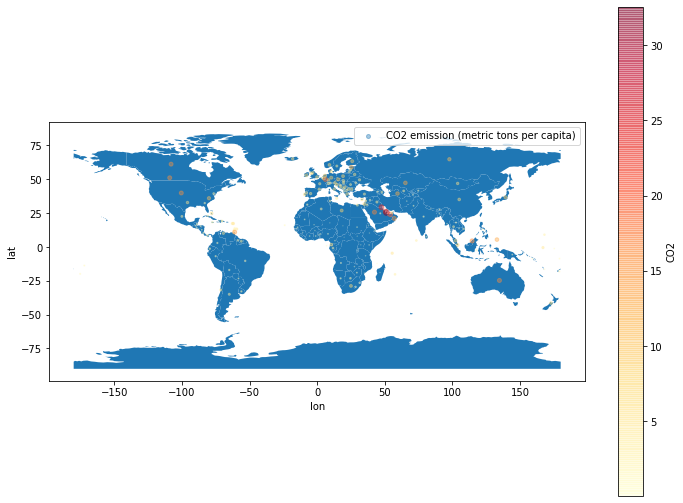

In [124]:
#plot CO2 data on worldmap using geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
from shapely.geometry import Point, LineString

#fig, ax = plt.subplots()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
CO2_df.plot(ax=world.plot(figsize=(12,9)), kind="scatter", x="lon", y="lat",
    s=CO2_df['CO2'], label="CO2 emission (metric tons per capita)",
    c="CO2", cmap='YlOrRd',
    colorbar=True, alpha=0.4)
plt.legend()
plt.show()

In [132]:
CO2_df.sort_values('CO2', ascending=False)

,country,CO2,lat,lon
146,Qatar,32.559748,25.333698,51.229530
94,Kuwait,23.662938,29.273396,47.497948
13,Bahrain,21.071542,26.155125,50.534461
189,United Arab Emirates,20.203046,24.000249,53.999483
106,Luxembourg,17.859670,49.815868,6.129675
...,...,...,...,...
149,Rwanda,0.075624,-1.964663,30.064436
34,Chad,0.070706,15.613414,19.015617
33,Central African Republic,0.067214,7.032360,19.998123
162,Somalia,0.048421,8.367677,49.083416


In [125]:
#What countries are making the most progress in CO2 emissions per capita over the last 10 years. 

# Get Climate Data



In [9]:
import json
import requests

base_url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/'

#set type to monthly average
type= 'mavg'
#set GCM Model
model = 'cccma_cgcm3_1'
#set sres emissions scenario
scenario='a2'
#set var to temperature in degrees Celsius and precipitation in millimeters
var='tas'
#var= ['tas', 'pr']
#set start and end year for the time period we select
start = '1980'
end = '1999'
#set country code using the iso codes from the following website: https://unstats.un.org/unsd/methodology/m49/
ISO3= 'USA'

#create an empty dataframe
climate_df = pd.DataFrame(columns=[])

# List of climate variables we want
vars = ["tas", "pr"]

climate_list = []

# For each variable, access its information through the API call
for var in vars:
    desired_endpoint = type+'/'+var+'/'+start+'/'+end+'/'+ISO3
    req = requests.get(base_url+desired_endpoint).json()
    for x in range(len(req)):

        climate_list.append([req[x]['fromYear'], req[x]['toYear'], req[x]['variable'],
                             req[x]['gcm'], req[x]['monthVals']])
                         
climate_df = pd.DataFrame(climate_list, columns=['fromYear','toYear','variable','gcm','monthVals'])

In [13]:
#view req to see what is available
req

[{'gcm': 'bccr_bcm2_0',
  'variable': 'pr',
  'monthVals': [54.08542875,
   50.10966809,
   59.51437374,
   65.55661286,
   70.43493967,
   68.00114649,
   74.48428044,
   74.43675767,
   76.55364909,
   69.6023086,
   65.11055405,
   57.89741514],
  'fromYear': 1980,
  'toYear': 1999},
 {'gcm': 'cccma_cgcm3_1',
  'variable': 'pr',
  'monthVals': [62.24072027,
   57.24048448,
   60.46462325,
   59.70685447,
   65.48141856,
   67.01421827,
   68.07160133,
   65.0143177,
   66.89814055,
   64.13912761,
   71.3859928,
   70.08152903],
  'fromYear': 1980,
  'toYear': 1999},
 {'gcm': 'cnrm_cm3',
  'variable': 'pr',
  'monthVals': [64.41341328,
   57.52317639,
   70.80296506,
   80.30451778,
   91.53901043,
   92.17370944,
   97.61402443,
   90.73968503,
   86.94435889,
   81.82628371,
   68.19157718,
   66.61348796],
  'fromYear': 1980,
  'toYear': 1999},
 {'gcm': 'csiro_mk3_5',
  'variable': 'pr',
  'monthVals': [69.54382106,
   64.10854116,
   66.03073631,
   57.06770773,
   65.87576136,


In [10]:
#declare empty month lists
January=[]
February=[]
March=[]
April=[]
May=[]
June=[]
July=[]
August=[]
September=[]
October=[]
November=[]
December=[]

#for loop for breaking list of values in monthVals into each seperate month to make into a seperate column based on the month
for x in  range(len(climate_df['monthVals'])):

    monthly_list = climate_df['monthVals'][x]
    
    for y in range(len(monthly_list)):
        if y == 0:
            January.append(climate_df['monthVals'][x][y])         
        if y == 1:
            February.append(climate_df['monthVals'][x][y])       
        if y == 2:
            March.append(climate_df['monthVals'][x][y])    
        if y == 3:
            April.append(climate_df['monthVals'][x][y])      
        if y == 4:
            May.append(climate_df['monthVals'][x][y])    
        if y == 5:
            June.append(climate_df['monthVals'][x][y])    
        if y == 6:
            July.append(climate_df['monthVals'][x][y])    
        if y == 7:
            August.append(climate_df['monthVals'][x][y])    
        if y == 8:
            September.append(climate_df['monthVals'][x][y])      
        if y == 9:
            October.append(climate_df['monthVals'][x][y])      
        if y == 10:
            November.append(climate_df['monthVals'][x][y])    
        if y == 11:
            December.append(climate_df['monthVals'][x][y])  

In [11]:
#write each of the lists to a new column in climate df
climate_df['January'] = January
climate_df['February'] = February
climate_df['March'] = March
climate_df['April'] = April
climate_df['May'] = May
climate_df['June'] = June
climate_df['July'] = July
climate_df['August'] = August
climate_df['September'] = September
climate_df['October'] = October
climate_df['November'] = November
climate_df['December'] = December

In [12]:
climate_df.head(n=20)

,fromYear,toYear,variable,gcm,monthVals,January,February,March,April,May,June,July,August,September,October,November,December
0,1980,1999,tas,bccr_bcm2_0,"[-9.621845312, -8.451683216, -3.776517949, 2.6...",-9.621845,-8.451683,-3.776518,2.673571,9.254254,14.923076,18.226249,17.891722,13.545309,6.414062,-0.960048,-6.717319
1,1980,1999,tas,cccma_cgcm3_1,"[-6.553893777, -5.332240573, -2.262895617, 4.1...",-6.553894,-5.332241,-2.262896,4.144794,10.431347,15.541862,18.579538,18.145922,13.772297,7.328321,1.313857,-3.455934
2,1980,1999,tas,cnrm_cm3,"[-5.330243422, -4.215476514, -0.709827299, 4.4...",-5.330243,-4.215477,-0.709827,4.470434,10.088917,15.227439,18.262701,18.049429,14.166159,7.522809,1.039261,-3.413833
3,1980,1999,tas,csiro_mk3_5,"[-0.139015673, 0.73596492, 3.229521754, 7.7141...",-0.139016,0.735965,3.229522,7.714191,14.065831,19.511130,22.765777,22.153724,17.046324,10.202067,3.977920,1.121230
4,1980,1999,tas,gfdl_cm2_0,"[-7.6333226610595855, -6.176652675259838, -3.0...",-7.633323,-6.176653,-3.093852,2.306827,8.531947,13.655664,16.383521,15.581163,10.823236,4.625519,-1.796606,-6.483632
5,1980,1999,tas,gfdl_cm2_1,"[-6.557654934929099, -5.175885017375426, -1.97...",-6.557655,-5.175885,-1.977376,3.210390,9.847923,15.796591,18.250410,17.166346,12.308777,5.997367,-0.340646,-5.088051
6,1980,1999,tas,ingv_echam4,"[-2.690718881507859, -1.6851125132114, 1.41173...",-2.690719,-1.685113,1.411735,6.440022,12.246586,17.563830,20.771716,20.361977,16.526100,10.079823,3.373039,-1.347184
7,1980,1999,tas,inmcm3_0,"[-4.114518011003955, -2.7722664545315667, -0.0...",-4.114518,-2.772266,-0.046574,5.494557,11.045377,15.820819,17.964167,17.142591,13.218335,7.533438,1.551489,-2.583340
8,1980,1999,tas,ipsl_cm4,"[-2.232596342701506, -1.498004180831118, 1.654...",-2.232596,-1.498004,1.654728,5.661785,10.896510,15.693228,18.641606,17.681169,13.310733,7.521953,2.119650,-1.413283
9,1980,1999,tas,miroc3_2_medres,"[-3.777629176875919, -2.886909123370383, -0.03...",-3.777629,-2.886909,-0.030943,5.794512,12.110617,17.150268,19.421730,18.411704,14.240837,8.257363,2.527663,-1.697896
